<a href="https://colab.research.google.com/github/kimwonjvn/Term-Project/blob/main/19100249_%EA%B9%80%EC%9B%90%EC%A4%80_Zero_Shot__Weapon_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Grounding DINO

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

%cd {HOME}
!git clone -q https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!pip install -q -e .
!pip install -q roboflow

/content
/content
/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.1 MB/s eta 0:00:0

## Download Grounding DINO Weights

In [ ]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights
!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content
/content/weights


## Load Grounding DINO Pre-Trained Model

In [ ]:
%cd {HOME}/GroundingDINO

CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model(CONFIG_PATH, WEIGHTS_PATH)

/content/GroundingDINO
/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True
/content/weights/groundingdino_swint_ogc.pth ; exist: True


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


## Inference Image Function

In [ ]:
import numpy as np
from PIL import Image
import groundingdino.datasets.transforms as T

def inference(img, prompt, box_threshold=0.35, text_threshold=0.25):
    transform = T.Compose([
        T.RandomResize([800], max_size=1333),
        T.ToTensor(),
        T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ])

    image_transformed, _ = transform(Image.fromarray(img), None)

    boxes, logits, phrases = predict(
        model=model,
        image=image_transformed,
        caption=prompt,
        box_threshold=box_threshold,
        text_threshold=text_threshold
    )

    annotated_frame = annotate(image_source=img, boxes=boxes, logits=logits, phrases=phrases)

    return annotated_frame

## Download Weapon Data

In [ ]:
!wget -q https://as1.ftcdn.net/v2/jpg/00/59/88/98/1000_F_59889858_ajaAZ9rcd1REilprZ3ljwv8GE8ytbH01.jpg -O test1.jpg

In [ ]:
!wget -q https://v.ftcdn.net/01/66/61/98/700_F_166619870_niF1NGTZahuIcP9Q0bjXPZrp1PxwAnpn_ST.mp4 -O test2.mp4

In [ ]:
!wget -q https://v.ftcdn.net/01/66/62/07/700_F_166620726_2gUQMe15AT04yYI2yxCr6FIWnPCP3dtw_ST.mp4 -O test3.mp4

## Weapon detection

In [ ]:
import locale
print(locale.getpreferredencoding())

def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
print(locale.getpreferredencoding())

UTF-8
UTF-8


/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:881: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


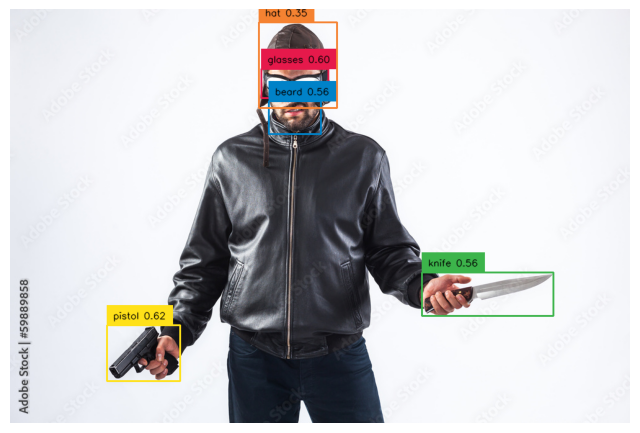

In [ ]:
import cv2
import matplotlib.pyplot as plt

TEXT_PROMPT = "knife, pistol, glasses, hat, beard"

img = cv2.imread("/content/GroundingDINO/test1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

result_img = inference(img, TEXT_PROMPT)

plt.figure(figsize=(8, 8))
plt.imshow(result_img[:, :, ::-1])
plt.axis("off")
plt.show()

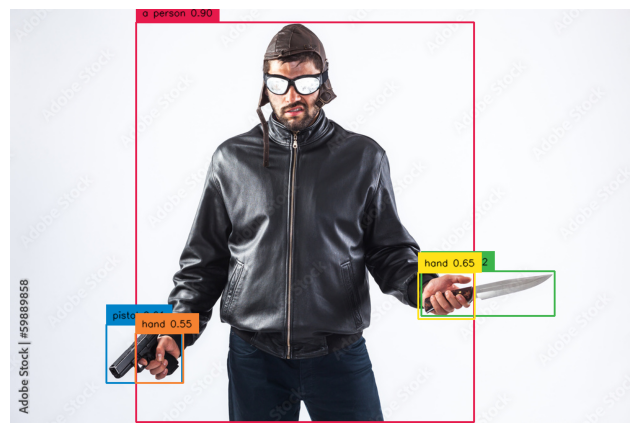

In [ ]:
import cv2
import matplotlib.pyplot as plt

TEXT_PROMPT = "A person with a knife and pistol in his or her hand"

img = cv2.imread("/content/GroundingDINO/test1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

result_img = inference(img, TEXT_PROMPT)
out.write(result_img)

plt.figure(figsize=(8, 8))
plt.imshow(result_img[:, :, ::-1])
plt.axis("off")
plt.show()

### Video

In [ ]:
from google.colab import files

TEXT_PROMPT = "A person with a knife and mask in his or her hand"

cap = cv2.VideoCapture("/content/GroundingDINO/test2.mp4")

fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
out = cv2.VideoWriter('/content/test2.mp4', fourcc, cap.get(cv2.CAP_PROP_FPS), (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

while cap.isOpened():
    ret, img = cap.read()
    if not ret:
        break

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    result_img = inference(img, TEXT_PROMPT)

    out.write(result_img)

out.release()

files.download('/content/test2.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
TEXT_PROMPT = "A person with a gun and mask in his or her hand"

cap = cv2.VideoCapture("/content/GroundingDINO/test3.mp4")

fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
out = cv2.VideoWriter('/content/test3.mp4', fourcc, cap.get(cv2.CAP_PROP_FPS), (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

while cap.isOpened():
    ret, img = cap.read()
    if not ret:
        break

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    result_img = inference(img, TEXT_PROMPT)

    out.write(result_img)

out.release()

files.download('/content/test3.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>